### Question 3.8 

In [46]:
# Load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.stats import levene
from stemgraphic import stem_graphic

In [47]:
# Load data
CH01PR28 = pd.read_excel("C:\\Users\\kwame\\Downloads\\CH01P28.xlsx")

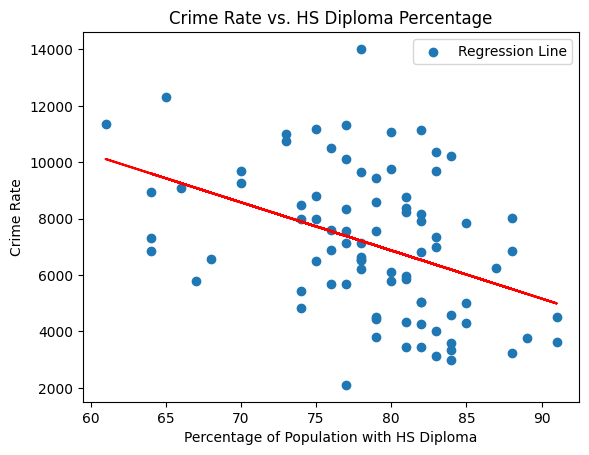

In [48]:
# Create a scatterplot
plt.scatter(CH01PR28['hs'], CH01PR28['crime'])
plt.xlabel('Percentage of Population with HS Diploma')
plt.ylabel('Crime Rate')
plt.title('Crime Rate vs. HS Diploma Percentage')

# Fit the linear regression model
X = CH01PR28['hs']
y = CH01PR28['crime']

model2 = np.polyfit(X, y, 1)  # Fit a first-degree (linear) polynomial
y_fit = np.polyval(model2, X)

# Add the regression line to the plot
plt.plot(X, y_fit, color='red')
plt.legend(['Regression Line'])

plt.show()

#### a. The stem and leaf plot of high school diploma rates shows no obvious outliers and a symmetric, bell-shaped distribution.

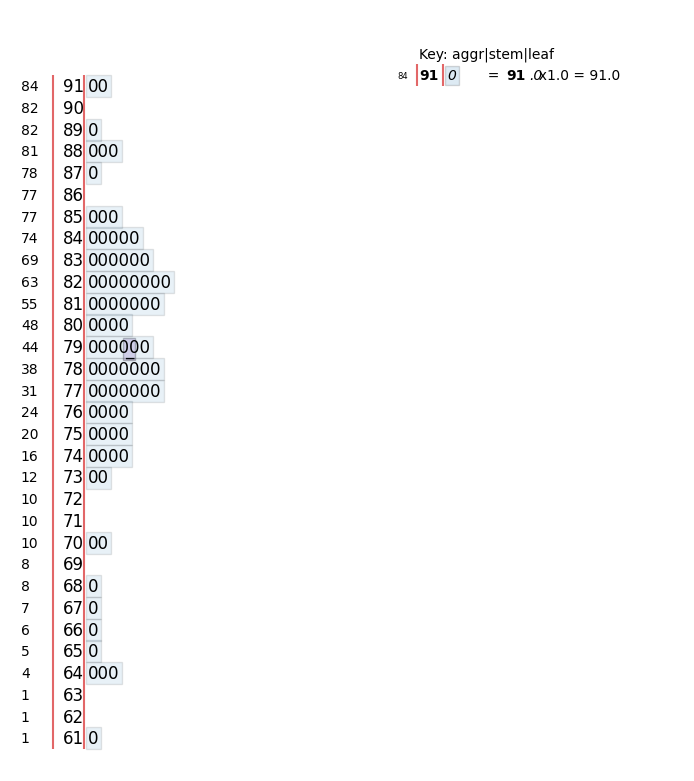

In [49]:
stem_graphic(X)
plt.show()

#### b. The boxplot of residuals shows potentially one outlier and a symmetric distribution.

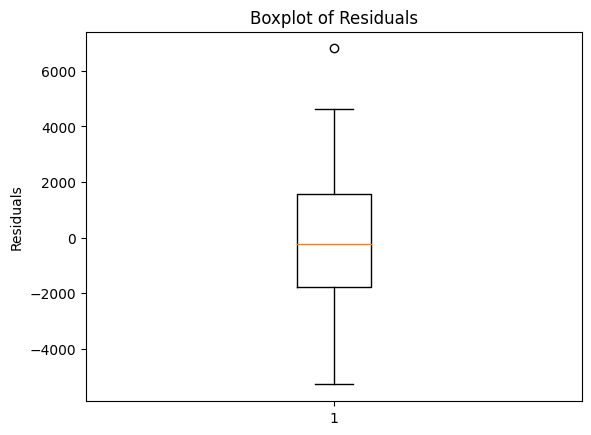

In [50]:
# Calculate the residuals
residuals = y - y_fit
# Create a boxplot for the residuals
plt.boxplot(residuals)
plt.ylabel('Residuals')
plt.title('Boxplot of Residuals')
plt.show()

#### c. There seems to be no obvious non-random patterns in this plot.  It's possible there is some slight curvature in the relationship between X and Y as shown by the 'lowess' fit to this data, but it is still very similar to a horizontal line at e = 0. This curvature could be more a function of the tails of the X distribution than the errors. From part (a) that most of the X values are centered around a mid-point, with fewer in the tails. This could cause the middle part of the data to drive the fit of the model, and the model may not fit the data in the tails of the X distribution as well. 

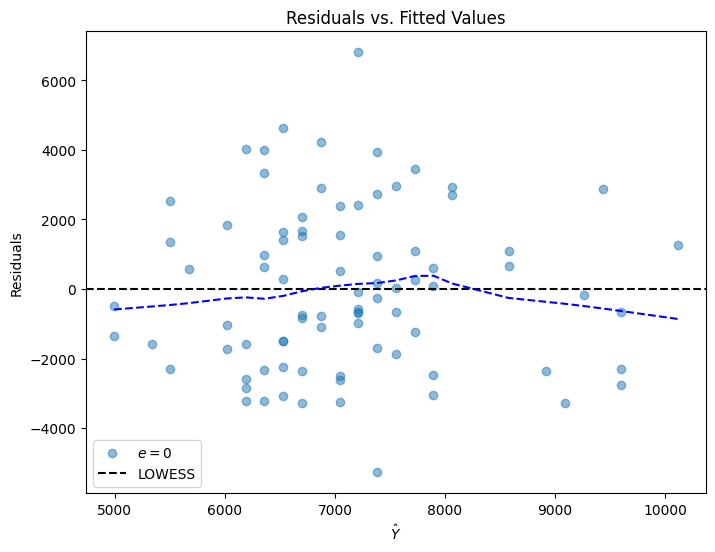

In [51]:
# Calculate the fitted values
fitted_values = y_fit

# Create a scatter plot of residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.xlabel(r'$\hat{Y}$')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--')

# Calculate and add a LOWESS line
lowess = sm.nonparametric.lowess(residuals, fitted_values, frac=0.66)
plt.plot(lowess[:, 0], lowess[:, 1], color='blue', linestyle='--', label='LOWESS')

# Add a legend
plt.legend(['$e=0$', 'LOWESS'], loc='lower left')

plt.show()

#### d. There does appear to be some issue with the tails, as evidenced by the data pulling away from the line at the ends. A test of the normality assumption using the correlation coefficient shows that normality is reasonable, since \(r = 0.988\), which is bigger than the critical value \(r = 0.985\) for \(n = 84\).

Pearson correlation: 0.9889777054561518
P-value: 8.421429376005808e-70


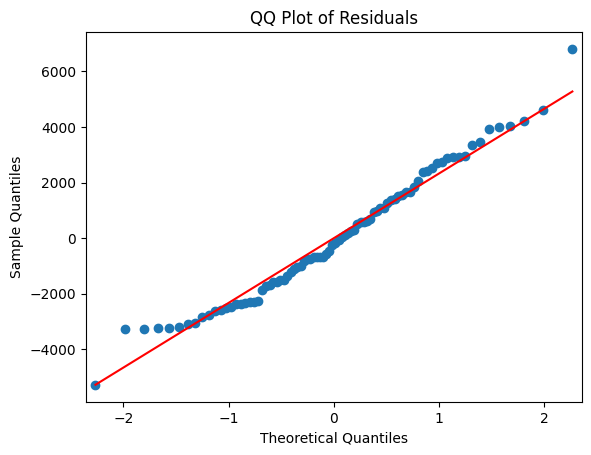

In [52]:
# Create a QQ plot
sm.qqplot(residuals, line='s')  # 's' for standard normal distribution line
plt.title('QQ Plot of Residuals')

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(sm.ProbPlot(residuals).theoretical_quantiles, sm.ProbPlot(residuals).sample_quantiles)
print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")

plt.show()

#### e. To conduct the Brown-Forsythe test of homogeneity of error variances, you have to create a new grouping variable according to the book's requested cutoff:  \(X <= 69\) versus \(X > 69\).  This test will compare the variance of the residuals between the two groups.  Small values of \(p\) reflect larger differences in group variances. Here, there is no evidence that the variances are different.

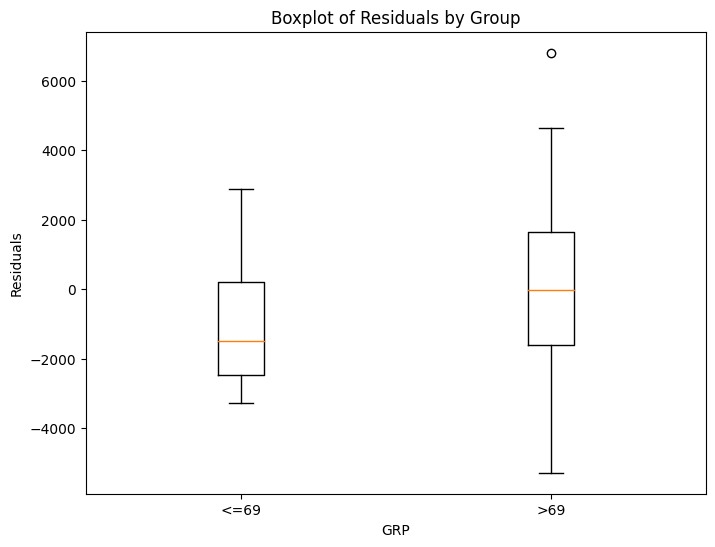

GRP
<=69    4.682921e+06
>69     5.532818e+06
Name: E, dtype: float64
Brown-Forsythe test statistic: 0.1260381089328649
P-value: 0.7234872659499937


In [53]:
# Create a binary grouping variable 'GRP' based on 'hs' (assuming the cutoff is 69)
CH01PR28['GRP'] = np.where(CH01PR28['hs'] <= 69, '<=69', '>69')

# Calculate the residuals and add them as a new column 'E'
CH01PR28['E'] = y - y_fit

# Create a boxplot to visualize residuals by group
plt.figure(figsize=(8, 6))
plt.boxplot([CH01PR28[CH01PR28['GRP'] == '<=69']['E'], CH01PR28[CH01PR28['GRP'] == '>69']['E']], labels=['<=69', '>69'])
plt.ylabel('Residuals')
plt.xlabel('GRP')
plt.title('Boxplot of Residuals by Group')
plt.show()

# Calculate the variance of residuals for each group
variance_by_group = CH01PR28.groupby('GRP')['E'].var()
print(variance_by_group)

# Perform the Brown-Forsythe test
group1 = CH01PR28[CH01PR28['GRP'] == '<=69']['E']
group2 = CH01PR28[CH01PR28['GRP'] == '>69']['E']
statistic, p_value = levene(group1, group2, center='median')
print(f"Brown-Forsythe test statistic: {statistic}")
print(f"P-value: {p_value}")